<a href="https://colab.research.google.com/github/IngErnestoAlvarez/terremoto_research/blob/main/TP1_economic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
import numpy as np


In [ ]:
train_values = pd.read_csv('train_values.csv', usecols=[0,4,*range(15,26),*range(28,39)])
train_labels = pd.read_csv('train_labels.csv')

In [ ]:
#Dataframe con los costos en materiales por piso, explicacion en el informe
material_costs = pd.DataFrame({
    'material':['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',\
                'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',\
                'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered'],
    'prices':[2750,3250,750,4400,4550,3120,5000,3500,12000,12000]

})
material_costs


,material,prices
0,has_superstructure_adobe_mud,2750
1,has_superstructure_mud_mortar_stone,3250
2,has_superstructure_stone_flag,750
3,has_superstructure_cement_mortar_stone,4400
4,has_superstructure_mud_mortar_brick,4550
5,has_superstructure_cement_mortar_brick,3120
6,has_superstructure_timber,5000
7,has_superstructure_bamboo,3500
8,has_superstructure_rc_non_engineered,12000
9,has_superstructure_rc_engineered,12000


In [ ]:
#Hago un merge de los dos dataframes para tener toda la informacion en uno
df_train = train_values.merge(train_labels, how='inner')
df_train.groupby('damage_grade').agg('count')

,building_id,count_floors_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
damage_grade,,,,,,,,,,,,,,,,,,,,,
1,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124,...,25124,25124,25124,25124,25124,25124,25124,25124,25124,25124
2,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259,...,148259,148259,148259,148259,148259,148259,148259,148259,148259,148259
3,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218,...,87218,87218,87218,87218,87218,87218,87218,87218,87218,87218


In [ ]:
#Calculo el costo en materiales por piso, para esto se tomo como criterio que el costo de un piso es la suma de los costos
#de cada uno de los materiales
#Agrego una columna de costo por piso
cost_by_floor = []
materials = list(df_train.iloc[:,2:12].columns)
cost_material_dict = material_costs.set_index('material').to_dict()['prices']

for i in range(260601):
    cost = 0
    for material in materials:
        if df_train[material][i]:
            cost += cost_material_dict[material]
    cost_by_floor.append(cost)

df_train['cost_by_floor'] = cost_by_floor
df_train

,building_id,count_floors_pre_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,...,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,cost_by_floor
0,802906,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,6000
1,28830,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3250
2,94947,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3250
3,590882,2,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,2,11750
4,201944,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3250
260597,669485,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3250
260598,602512,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3250
260599,151409,2,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,3120


In [ ]:
#Agrego una nueva columna con el costo aproximado en materiales por edificio 
df_train['cost_by_building'] = df_train['cost_by_floor']*df_train['count_floors_pre_eq']

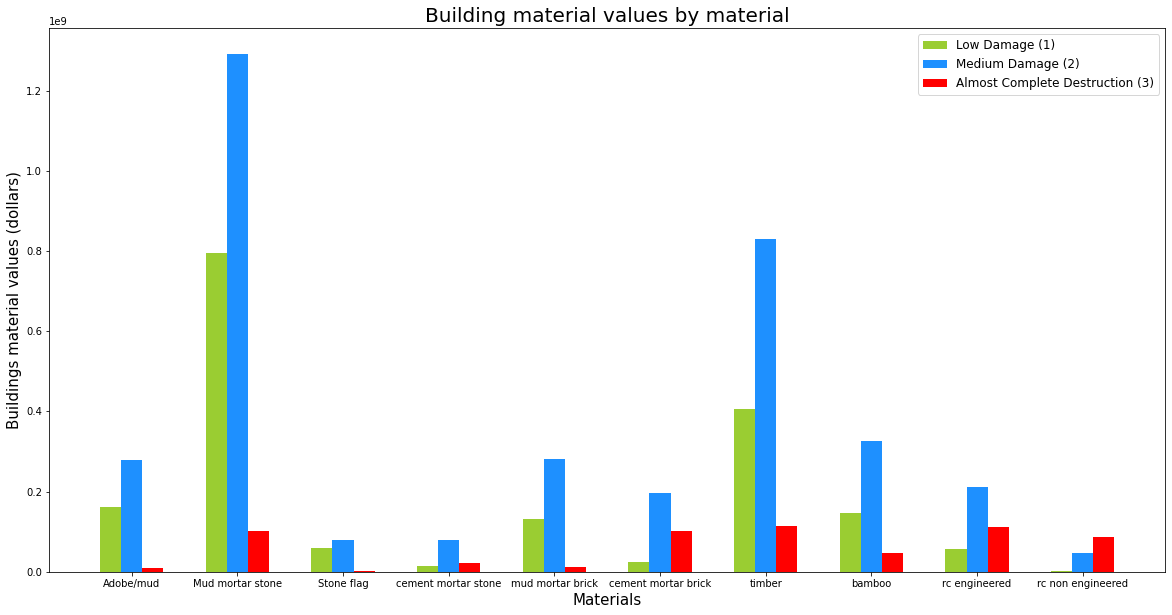

In [ ]:
results = [[],[],[]]
for material in materials:
    results[0].append(list(df_train.loc[df_train[material] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[2])
    results[1].append(list(df_train.loc[df_train[material] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[1])
    results[2].append(list(df_train.loc[df_train[material] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[0])

results

X = ['Adobe/mud','Mud mortar stone','Stone flag','cement mortar stone','mud mortar brick','cement mortar brick','timber','bamboo','rc engineered','rc non engineered']

damage_1 = results[0]
damage_2 = results[1]
damage_3 = results[2]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, damage_1, 0.2, label = 'Low Damage (1)', color = 'yellowgreen')
plt.bar(X_axis + 0, damage_2, 0.2, label = 'Medium Damage (2)', color = 'dodgerblue')
plt.bar(X_axis + 0.2, damage_3, 0.2, label = 'Almost Complete Destruction (3)', color = 'r')

plt.xticks(X_axis, X)
plt.xlabel("Materials", size = 15)
plt.ylabel("Buildings material values (dollars)", size = 15)
plt.title("Building material values by material", size = 20)
plt.legend(fontsize = 12)

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)



fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 10)
fig.savefig('test2png.png', dpi=100)

plt.show()

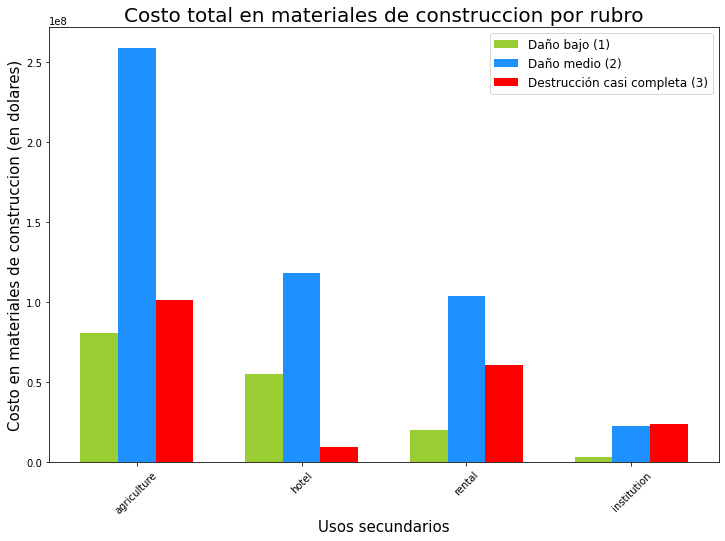

In [ ]:
secondary_uses = list(df_train.iloc[:,13:17].columns)

results = [[],[],[]]
for sec_use in secondary_uses:
    results[0].append(list(df_train.loc[df_train[sec_use] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[2])
    results[1].append(list(df_train.loc[df_train[sec_use] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[1])
    results[2].append(list(df_train.loc[df_train[sec_use] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg('sum')['cost_by_building'])[0])

X = ['agriculture','hotel','rental','institution']#,'school','industry','health post','gov office','police','other']

damage_1 = results[0]
damage_2 = results[1]
damage_3 = results[2]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.23, damage_1, 0.23, label = 'Daño bajo (1)', color = 'yellowgreen')
plt.bar(X_axis + 0, damage_2, 0.23, label = 'Daño medio (2)', color = 'dodgerblue')
plt.bar(X_axis + 0.23, damage_3, 0.23, label = 'Destrucción casi completa (3)', color = 'r')

plt.xticks(X_axis, X)
plt.xlabel("Usos secundarios", size = 15)
plt.ylabel("Costo en materiales de construccion (en dolares)", size = 15)
plt.title("Costo total en materiales de construccion por rubro", size = 20)
plt.legend(fontsize = 12)

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.xticks(rotation=45)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)
fig.savefig('test2png.png', dpi=100)

plt.show()

### ANALISIS NORMALIZADO:

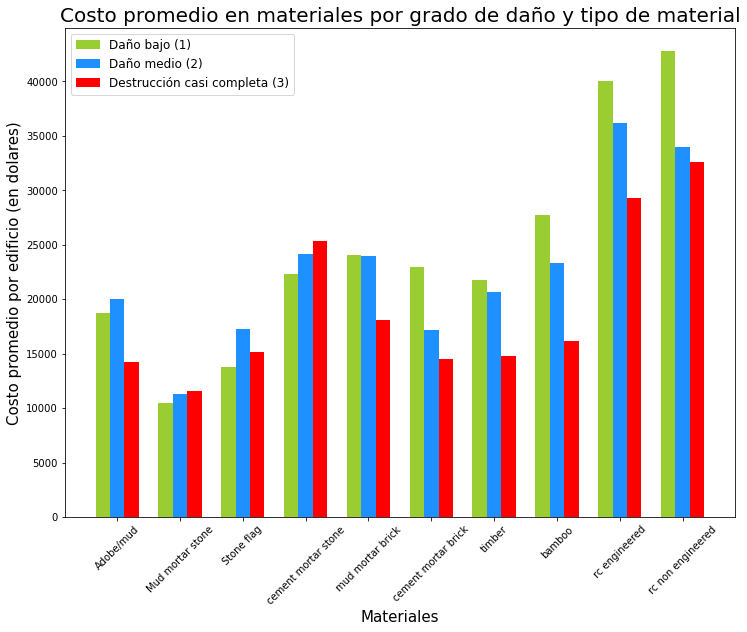

In [ ]:
results = [[],[],[]]
for material in materials:
    cost_by_damage = df_train.loc[df_train[material] == 1,['damage_grade','cost_by_building']].groupby('damage_grade').agg(['sum','count'])
    cost_normalized = list(cost_by_damage[('cost_by_building','sum')]/cost_by_damage[('cost_by_building','count')])

    results[0].append(cost_normalized[2])
    results[1].append(cost_normalized[1])
    results[2].append(cost_normalized[0])

X = ['Adobe/mud','Mud mortar stone','Stone flag','cement mortar stone','mud mortar brick','cement mortar brick','timber','bamboo','rc engineered','rc non engineered']

damage_1 = results[0]
damage_2 = results[1]
damage_3 = results[2]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.23, damage_1, 0.23, label = 'Daño bajo (1)', color = 'yellowgreen')
plt.bar(X_axis + 0, damage_2, 0.23, label = 'Daño medio (2)', color = 'dodgerblue')
plt.bar(X_axis + 0.23, damage_3, 0.23, label = 'Destrucción casi completa (3)', color = 'r')

plt.xticks(X_axis, X)
plt.xlabel("Materiales", size = 15)
plt.ylabel("Costo promedio por edificio (en dolares)", size = 15)
plt.title("Costo promedio en materiales por grado de daño y tipo de material", size = 20)
plt.legend(fontsize = 12)

scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)

plt.xticks(rotation=45)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 9)
fig.savefig('test2png.png', dpi=100)

plt.show()